# Network Density
Show different Networks and their basic stats (of particular interest for this project is the street density)

In [1]:
import common_options as co
from helpers import redistribute_graph
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon

%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.1.0'

Innere Stadt, Wien, 1010, Österreich
2866662.7485616487
n                                                                             597
m                                                                            1786
k_avg                                                                     5.98325
edge_length_total                                                          120293
edge_length_avg                                                           67.3535
streets_per_node_avg                                                      3.07203
streets_per_node_counts                 {0: 0, 1: 51, 2: 0, 3: 404, 4: 139, 5: 3}
streets_per_node_proportions    {0: 0.0, 1: 0.08542713567839195, 2: 0.0, 3: 0....
intersection_count                                                            546
street_length_total                                                       60146.7
street_segment_count                                                          893
street_length_avg                         

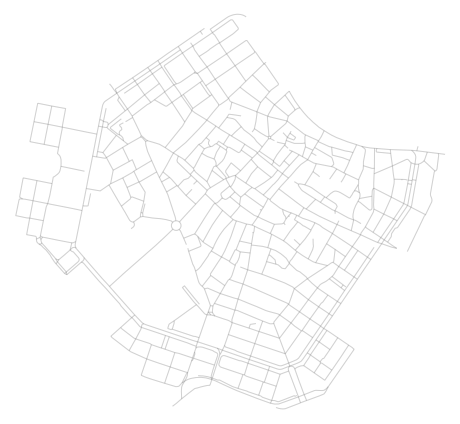

Margareten, Wien, 1050, Österreich
2012762.7334614508
n                                                                             278
m                                                                             866
k_avg                                                                     6.23022
edge_length_total                                                         81688.8
edge_length_avg                                                           94.3289
streets_per_node_avg                                                       3.2554
streets_per_node_counts                 {0: 0, 1: 23, 2: 0, 3: 139, 4: 115, 5: 1}
streets_per_node_proportions    {0: 0.0, 1: 0.08273381294964029, 2: 0.0, 3: 0....
intersection_count                                                            255
street_length_total                                                       40844.4
street_segment_count                                                          433
street_length_avg                           

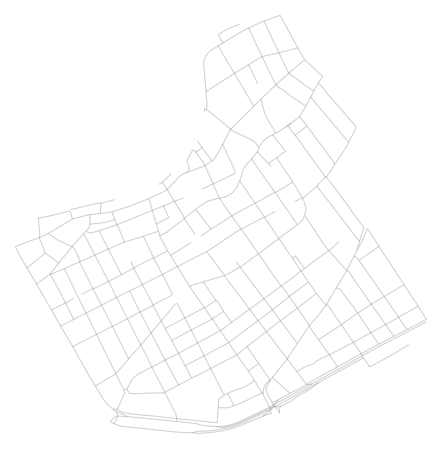

Rudolfsheim-Fünfhaus, Wien, 1150, Österreich
3915008.9474208313
n                                                                             479
m                                                                            1504
k_avg                                                                     6.27975
edge_length_total                                                          131594
edge_length_avg                                                           87.4958
streets_per_node_avg                                                      3.29436
streets_per_node_counts                 {0: 0, 1: 18, 2: 0, 3: 290, 4: 165, 5: 6}
streets_per_node_proportions    {0: 0.0, 1: 0.037578288100208766, 2: 0.0, 3: 0...
intersection_count                                                            461
street_length_total                                                       65796.8
street_segment_count                                                          752
street_length_avg                 

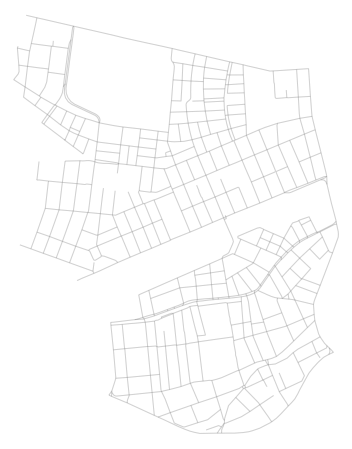

Neubau, Wien, 1070, Österreich
1607386.5367964904
n                                                                             169
m                                                                             520
k_avg                                                                     6.15385
edge_length_total                                                         53010.4
edge_length_avg                                                           101.943
streets_per_node_avg                                                      3.33136
streets_per_node_counts                   {0: 0, 1: 4, 2: 0, 3: 102, 4: 62, 5: 1}
streets_per_node_proportions    {0: 0.0, 1: 0.023668639053254437, 2: 0.0, 3: 0...
intersection_count                                                            165
street_length_total                                                       26505.2
street_segment_count                                                          260
street_length_avg                               

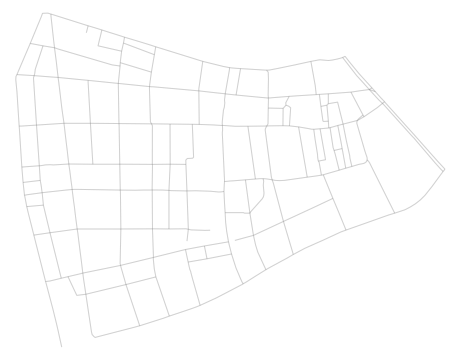

In [2]:
# load different networks from administrative boundaries

places = ('Innere Stadt, Wien, 1010, Österreich',
          'Margareten, Wien, 1050, Österreich',
          'Rudolfsheim-Fünfhaus, Wien, 1150, Österreich',
          'Neubau, Wien, 1070, Österreich')
for place in places:
    print(place)
    gdf = ox.geocode_to_gdf(place)
    area = ox.project_gdf(gdf).unary_union.area
    G = ox.graph_from_place(place, custom_filter=co.walking_filter_network_simplified, **co.graph_download_options)

    print(area)
    stats = ox.basic_stats(G, area=area)
    print(pd.Series(stats))
    fig, ax = ox.plot_graph(G, **co.graph_plot_options)

    #save graph
    place_fname = place.split(',')[2].strip()
    fig.savefig('figures/network_density_simplified_%s.svg' % place_fname)
    fig.savefig('figures/network_density_simplified_%s.png' % place_fname, bbox_inches='tight')
